# Week 1: Python for Quantitative Finance

## 🎯 Learning Objectives

By the end of this week, you will:
1. Master **NumPy** for efficient numerical computations with financial data
2. Use **Pandas** for time series manipulation with point-in-time awareness
3. Calculate **returns, volatility, and risk metrics** correctly
4. Understand **correlation, covariance** and their role in portfolio theory
5. Create **publication-quality financial visualizations**
6. Avoid common **look-ahead bias** mistakes

---

## Why Python for Quantitative Finance?

Python has become the **lingua franca** of quantitative finance:

| Reason | Details |
|--------|--------|
| **NumPy/Pandas** | Vectorized operations make financial calculations fast |
| **Rich Libraries** | scikit-learn, PyTorch, statsmodels, QuantLib |
| **Rapid Prototyping** | Quick iteration from idea to backtest |
| **Production Ready** | Many hedge funds deploy Python strategies in production |

> "At Jane Street, we use a combination of OCaml and Python. Python is used extensively for data analysis and research." - Jane Street Tech Blog

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Constants
TRADING_DAYS = 252  # Standard trading days per year

print("✅ Libraries loaded successfully!")
print(f"📚 Week 1: Python for Quantitative Finance")
print(f"🔧 NumPy version: {np.__version__}")
print(f"🔧 Pandas version: {pd.__version__}")

✅ Libraries loaded successfully!
📚 Week 1: Python for Quantitative Finance
🔧 NumPy version: 2.4.1
🔧 Pandas version: 2.3.3


---

# Part 1: NumPy Fundamentals for Finance

## Why NumPy over Pure Python?

NumPy is **100-1000x faster** than pure Python for numerical operations because:
1. **Vectorization**: Operations execute in optimized C code
2. **Broadcasting**: Apply operations across arrays efficiently
3. **Memory Layout**: Contiguous memory for cache optimization

### Speed Comparison

In [2]:
import time

# Generate sample return data
n_returns = 1_000_000
returns_list = [np.random.randn() * 0.01 for _ in range(n_returns)]
returns_array = np.array(returns_list)

# Pure Python - Calculate cumulative return
start = time.time()
cumulative_python = 1
for r in returns_list:
    cumulative_python *= (1 + r)
python_time = time.time() - start

# NumPy - Vectorized
start = time.time()
cumulative_numpy = np.prod(1 + returns_array)
numpy_time = time.time() - start

print("SPEED COMPARISON: Cumulative Returns")
print("="*60)
print(f"Data points: {n_returns:,}")
print(f"\nPure Python: {python_time:.4f} seconds")
print(f"NumPy:       {numpy_time:.4f} seconds")
print(f"\n🚀 NumPy is {python_time/numpy_time:.0f}x faster!")
print(f"\nResults match: {np.isclose(cumulative_python, cumulative_numpy)}")

SPEED COMPARISON: Cumulative Returns
Data points: 1,000,000

Pure Python: 0.0769 seconds
NumPy:       0.0034 seconds

🚀 NumPy is 22x faster!

Results match: True


### 📊 OUTPUT EXPLANATION:

- **Pure Python** uses a loop - each iteration has Python interpreter overhead
- **NumPy** executes the entire operation in compiled C code
- In production, this speedup is critical for real-time calculations

---

## Critical NumPy Functions for Finance

In [4]:
# Essential NumPy functions for quant finance

# Simulate daily returns for demonstration
daily_returns = np.random.normal(0.0005, 0.02, 252)  # μ=5bp/day, σ=2%/day

print("ESSENTIAL NUMPY FUNCTIONS FOR FINANCE")
print("="*60)

# 1. Log returns from prices
prices = 100 * np.cumprod(1 + daily_returns)  # Generate price series
log_returns = np.log(prices[1:] / prices[:-1])
print("\n1. LOG RETURNS: np.log(P_t / P_t-1)")
print(f"   Mean log return: {log_returns.mean():.6f}")

# 2. Cumulative returns
cum_return = np.cumprod(1 + daily_returns) - 1
print("\n2. CUMULATIVE RETURNS: np.cumprod(1 + r) - 1")
print(f"   Total return: {cum_return[-1]:.2%}")

# 3. Rolling calculations (using stride tricks or pandas)
window = 20
rolling_mean = np.convolve(daily_returns, np.ones(window)/window, mode='valid')
print(f"\n3. ROLLING MEAN ({window} days): np.convolve")
print(f"   Latest 20-day avg return: {rolling_mean[-1]:.6f}")

# 4. Correlation matrix
asset_returns = np.random.multivariate_normal(
    mean=[0.0005, 0.0003, 0.0004],
    cov=[[0.0004, 0.0002, 0.0001],
         [0.0002, 0.0003, 0.00015],
         [0.0001, 0.00015, 0.00035]],
    size=252
)
corr_matrix = np.corrcoef(asset_returns.T)
print("\n4. CORRELATION MATRIX: np.corrcoef")
print(f"   Shape: {corr_matrix.shape}")

# 5. Covariance matrix
cov_matrix = np.cov(asset_returns.T)
print("\n5. COVARIANCE MATRIX: np.cov")
print(f"   Shape: {cov_matrix.shape}")

# 6. Matrix operations for portfolio optimization
weights = np.array([0.4, 0.35, 0.25])
portfolio_var = weights @ cov_matrix @ weights  # w'Σw
portfolio_std = np.sqrt(portfolio_var)
print(f"\n6. PORTFOLIO VARIANCE: w'Σw = {portfolio_var:.8f}")
print(f"   Daily volatility: {portfolio_std:.4%}")
print(f"   Annualized volatility: {portfolio_std * np.sqrt(252):.2%}")

ESSENTIAL NUMPY FUNCTIONS FOR FINANCE

1. LOG RETURNS: np.log(P_t / P_t-1)
   Mean log return: -0.000235

2. CUMULATIVE RETURNS: np.cumprod(1 + r) - 1
   Total return: -5.36%

3. ROLLING MEAN (20 days): np.convolve
   Latest 20-day avg return: 0.002837

4. CORRELATION MATRIX: np.corrcoef
   Shape: (3, 3)

5. COVARIANCE MATRIX: np.cov
   Shape: (3, 3)

6. PORTFOLIO VARIANCE: w'Σw = 0.00024642
   Daily volatility: 1.5698%
   Annualized volatility: 24.92%


### 📊 OUTPUT EXPLANATION:

| Function | Use Case | Finance Application |
|----------|----------|--------------------|
| `np.log()` | Log returns | Time-additive returns |
| `np.cumprod()` | Cumulative returns | Equity curves |
| `np.corrcoef()` | Correlation matrix | Diversification analysis |
| `np.cov()` | Covariance matrix | Portfolio optimization |
| `@` (matmul) | Matrix multiplication | Portfolio variance w'Σw |

---

## Broadcasting: Efficient Array Operations

In [5]:
# Broadcasting example: Calculate excess returns for multiple assets
print("NUMPY BROADCASTING")
print("="*60)

# Asset returns: 252 days × 5 assets
n_days, n_assets = 252, 5
asset_returns = np.random.randn(n_days, n_assets) * 0.02

# Risk-free rate: varies by day (252 × 1)
rf_daily = np.random.uniform(0.0001, 0.0002, (n_days, 1))

# Calculate excess returns (broadcasting!)
# (252, 5) - (252, 1) → (252, 5)
excess_returns = asset_returns - rf_daily

print(f"Asset returns shape:   {asset_returns.shape}")
print(f"Risk-free rate shape:  {rf_daily.shape}")
print(f"Excess returns shape:  {excess_returns.shape}")

print("\n📊 Broadcasting automatically subtracted rf from EACH asset!")

# Another example: Z-score normalization
means = asset_returns.mean(axis=0)  # (5,)
stds = asset_returns.std(axis=0)    # (5,)
z_scores = (asset_returns - means) / stds  # Broadcasting!

print(f"\nZ-score normalized:")
print(f"   Mean of each column: {z_scores.mean(axis=0).round(10)}")
print(f"   Std of each column:  {z_scores.std(axis=0).round(2)}")

NUMPY BROADCASTING
Asset returns shape:   (252, 5)
Risk-free rate shape:  (252, 1)
Excess returns shape:  (252, 5)

📊 Broadcasting automatically subtracted rf from EACH asset!

Z-score normalized:
   Mean of each column: [ 0.  0. -0.  0. -0.]
   Std of each column:  [1. 1. 1. 1. 1.]


---

# Part 2: Pandas for Financial Time Series

## The DatetimeIndex: Your Best Friend

Financial data is **temporal**. Pandas DatetimeIndex provides:
- Automatic alignment of different time series
- Resampling (daily → weekly → monthly)
- Business day awareness
- Timezone handling

In [6]:
# Create financial time series
print("PANDAS DATETIME INDEX")
print("="*60)

# Generate business day date range
dates = pd.date_range('2023-01-01', periods=252, freq='B')  # B = Business days

# Create price series
np.random.seed(42)
returns = np.random.normal(0.0005, 0.015, 252)
prices = 100 * np.cumprod(1 + returns)

# Create DataFrame
df = pd.DataFrame({
    'price': prices,
    'returns': returns,
    'volume': np.random.randint(1000000, 5000000, 252)
}, index=dates)

print(f"Date range: {df.index[0].date()} to {df.index[-1].date()}")
print(f"Frequency: Business Days")
print(f"Total trading days: {len(df)}")

print("\n📊 Sample Data:")
print(df.head(10).to_string())

PANDAS DATETIME INDEX
Date range: 2023-01-02 to 2023-12-19
Frequency: Business Days
Total trading days: 252

📊 Sample Data:
                 price   returns   volume
2023-01-02  100.795071  0.007951  4280143
2023-01-03  100.636423 -0.001574  1406716
2023-01-04  101.664457  0.010215  3543590
2023-01-05  104.037860  0.023345  4699391
2023-01-06  103.724466 -0.003012  3762174
2023-01-09  103.412043 -0.003012  1541252
2023-01-10  105.913393  0.024188  2686293
2023-01-11  107.185574  0.012012  3349916
2023-01-12  106.484354 -0.006542  3812150
2023-01-13  107.404208  0.008638  4612610


In [7]:
# Resampling: Daily → Weekly → Monthly
print("RESAMPLING TIME SERIES")
print("="*60)

# Weekly OHLC
weekly = df['price'].resample('W').ohlc()
print("Weekly OHLC:")
print(weekly.head().to_string())

# Monthly returns
monthly_returns = df['returns'].resample('M').apply(lambda x: (1+x).prod() - 1)
print("\nMonthly Compounded Returns:")
print(monthly_returns.head(6).to_string())

# Volume by week
weekly_volume = df['volume'].resample('W').sum()
print(f"\nWeekly Volume (first 5 weeks): {weekly_volume.head().values}")

RESAMPLING TIME SERIES
Weekly OHLC:
                  open        high         low       close
2023-01-08  100.795071  104.037860  100.636423  103.724466
2023-01-15  103.412043  107.404208  103.412043  107.404208
2023-01-22  106.711315  106.711315  100.829945  100.829945
2023-01-29  100.029929  100.029929   95.751803   95.751803
2023-02-05   97.904756   97.904756   94.995423   94.995423

Monthly Compounded Returns:
2023-01-31   -0.023779
2023-02-28   -0.073826
2023-03-31   -0.043277
2023-04-30    0.035197
2023-05-31   -0.011483
2023-06-30    0.042971
Freq: ME

Weekly Volume (first 5 weeks): [17692014 16002221 14659657 12268561 13958076]


### 📊 OUTPUT EXPLANATION:

**Resampling Rules:**
- `'W'` = Weekly (Friday close)
- `'M'` = Month end
- `'Q'` = Quarter end
- `.ohlc()` = Open, High, Low, Close aggregation
- `.apply(lambda)` = Custom aggregation (like compounding returns)

---

## ⚠️ Point-in-Time Data: Avoiding Look-Ahead Bias

**The #1 cause of fake backtesting results!**

Point-in-time (PIT) data ensures you only use information **available at each historical moment**.

In [8]:
# CRITICAL: Look-ahead bias demonstration
print("⚠️  LOOK-AHEAD BIAS DEMONSTRATION")
print("="*60)

# Generate sample data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='B')
close = 100 + np.cumsum(np.random.randn(100) * 2)
df_pit = pd.DataFrame({'close': close}, index=dates)

# ❌ WRONG: Uses today's close in today's SMA (LOOK-AHEAD BIAS!)
df_pit['sma_20_WRONG'] = df_pit['close'].rolling(20).mean()

# ✅ CORRECT: Uses yesterday's SMA (shift by 1)
df_pit['sma_20_CORRECT'] = df_pit['close'].rolling(20).mean().shift(1)

# Generate signals
df_pit['signal_WRONG'] = (df_pit['close'] > df_pit['sma_20_WRONG']).astype(int)
df_pit['signal_CORRECT'] = (df_pit['close'] > df_pit['sma_20_CORRECT']).astype(int)

print("Look-ahead bias in moving average signals:\n")
print(df_pit[['close', 'sma_20_WRONG', 'sma_20_CORRECT', 'signal_WRONG', 'signal_CORRECT']].iloc[18:25].to_string())

print("\n📊 EXPLANATION:")
print("• sma_20_WRONG includes TODAY's price → look-ahead bias")
print("• sma_20_CORRECT uses data available BEFORE today")
print("\n⚠️  The WRONG version will show better backtest results!")
print("    But it's IMPOSSIBLE to trade in real life!")

⚠️  LOOK-AHEAD BIAS DEMONSTRATION
Look-ahead bias in moving average signals:

                close  sma_20_WRONG  sma_20_CORRECT  signal_WRONG  signal_CORRECT
2023-01-26  95.972665           NaN             NaN             0               0
2023-01-27  93.148058    103.023787             NaN             0               0
2023-01-30  96.079355    102.778083      103.023787             0               0
2023-01-31  95.627802    102.523628      102.778083             0               0
2023-02-01  95.762859    102.211157      102.523628             0               0
2023-02-02  92.913363    101.603908      102.211157             0               0
2023-02-03  91.824597    100.965637      101.603908             0               0

📊 EXPLANATION:
• sma_20_WRONG includes TODAY's price → look-ahead bias
• sma_20_CORRECT uses data available BEFORE today

⚠️  The WRONG version will show better backtest results!
    But it's IMPOSSIBLE to trade in real life!


In [9]:
# More look-ahead bias examples
print("COMMON LOOK-AHEAD BIAS MISTAKES")
print("="*60)

print("""
❌ WRONG: Using close price at time T to make decision at time T
   → You don't know close price until market closes!

❌ WRONG: Using same-day earnings announcement
   → Earnings released after hours, you can't trade on it same day

❌ WRONG: Survivorship bias in stock universe
   → Only testing on stocks that exist TODAY
   → Missing all the delisted/bankrupt stocks

❌ WRONG: Using adjusted prices without proper handling
   → Split adjustments applied retroactively

✅ CORRECT APPROACH:
   1. Always use .shift(1) for signals
   2. Use point-in-time databases
   3. Use universe as it existed at each point
   4. Account for announcement timing
""")

# Correct signal generation pattern
df_pit['momentum'] = df_pit['close'].pct_change(20)  # 20-day return
df_pit['signal_CORRECT'] = df_pit['momentum'].shift(1).apply(lambda x: 1 if x > 0 else 0)

print("\n✅ Correct Signal Generation Pattern:")
print("   momentum = close.pct_change(20)")
print("   signal = momentum.shift(1) > 0  # Use YESTERDAY's momentum")

COMMON LOOK-AHEAD BIAS MISTAKES

❌ WRONG: Using close price at time T to make decision at time T
   → You don't know close price until market closes!

❌ WRONG: Using same-day earnings announcement
   → Earnings released after hours, you can't trade on it same day

❌ WRONG: Survivorship bias in stock universe
   → Only testing on stocks that exist TODAY
   → Missing all the delisted/bankrupt stocks

❌ WRONG: Using adjusted prices without proper handling
   → Split adjustments applied retroactively

✅ CORRECT APPROACH:
   1. Always use .shift(1) for signals
   2. Use point-in-time databases
   3. Use universe as it existed at each point
   4. Account for announcement timing


✅ Correct Signal Generation Pattern:
   momentum = close.pct_change(20)
   signal = momentum.shift(1) > 0  # Use YESTERDAY's momentum


---

# Part 3: Returns Calculation

## Simple vs Log Returns

### Simple Returns
$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

### Log Returns (Continuously Compounded)
$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})$$

### When to Use Each?

| Property | Simple Returns | Log Returns |
|----------|---------------|-------------|
| **Time aggregation** | ❌ Multiply | ✅ Add |
| **Cross-sectional** | ✅ Average portfolios | ❌ Don't average |
| **Symmetry** | ❌ Asymmetric | ✅ Symmetric |
| **Small returns** | ≈ Equal | ≈ Equal |

In [10]:
# Returns calculation
print("RETURNS CALCULATION")
print("="*60)

# Sample price series
prices = pd.Series([100, 105, 103, 108, 106], 
                   index=pd.date_range('2023-01-01', periods=5, freq='D'))

# Simple returns
simple_returns = prices.pct_change()

# Log returns
log_returns = np.log(prices / prices.shift(1))

print("Price Series:")
print(prices.to_string())

print("\nSimple Returns:")
print(simple_returns.to_string())

print("\nLog Returns:")
print(log_returns.to_string())

# Verify: log returns are approximately equal to simple returns for small values
print("\n📊 For small returns, they're approximately equal:")
print(f"   Simple: {simple_returns.iloc[1]:.6f}")
print(f"   Log:    {log_returns.iloc[1]:.6f}")
print(f"   Difference: {abs(simple_returns.iloc[1] - log_returns.iloc[1]):.8f}")

RETURNS CALCULATION
Price Series:
2023-01-01    100
2023-01-02    105
2023-01-03    103
2023-01-04    108
2023-01-05    106
Freq: D

Simple Returns:
2023-01-01         NaN
2023-01-02    0.050000
2023-01-03   -0.019048
2023-01-04    0.048544
2023-01-05   -0.018519
Freq: D

Log Returns:
2023-01-01         NaN
2023-01-02    0.048790
2023-01-03   -0.019231
2023-01-04    0.047402
2023-01-05   -0.018692
Freq: D

📊 For small returns, they're approximately equal:
   Simple: 0.050000
   Log:    0.048790
   Difference: 0.00120984


In [11]:
# Time aggregation property
print("TIME AGGREGATION: Log Returns Add!")
print("="*60)

# Multi-period return using log returns (ADDS)
total_log_return = log_returns.sum()

# Multi-period return using simple returns (MULTIPLY)
total_simple_return = (1 + simple_returns).prod() - 1

# Verify
actual_return = (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0]
actual_log = np.log(prices.iloc[-1] / prices.iloc[0])

print(f"Actual simple return: {actual_return:.6f}")
print(f"Compounded simple:    {total_simple_return:.6f}")
print(f"\nActual log return:    {actual_log:.6f}")
print(f"Sum of log returns:   {total_log_return:.6f}")

print("\n✅ Log returns simply ADD for multi-period returns!")
print("   This makes time series analysis much easier.")

TIME AGGREGATION: Log Returns Add!
Actual simple return: 0.060000
Compounded simple:    0.060000

Actual log return:    0.058269
Sum of log returns:   0.058269

✅ Log returns simply ADD for multi-period returns!
   This makes time series analysis much easier.


---

# Part 4: Volatility and Risk Metrics

## Volatility: The Standard Deviation of Returns

$$\sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(r_i - \bar{r})^2}$$

### Annualization
- Daily → Annual: $\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$
- Monthly → Annual: $\sigma_{annual} = \sigma_{monthly} \times \sqrt{12}$

VOLATILITY CALCULATION
Daily volatility:     1.1862%
Annualized volatility: 18.83%

20-day rolling volatility (last 5 days):
   [0.19517007 0.19538744 0.19291959 0.18788075 0.22323815]


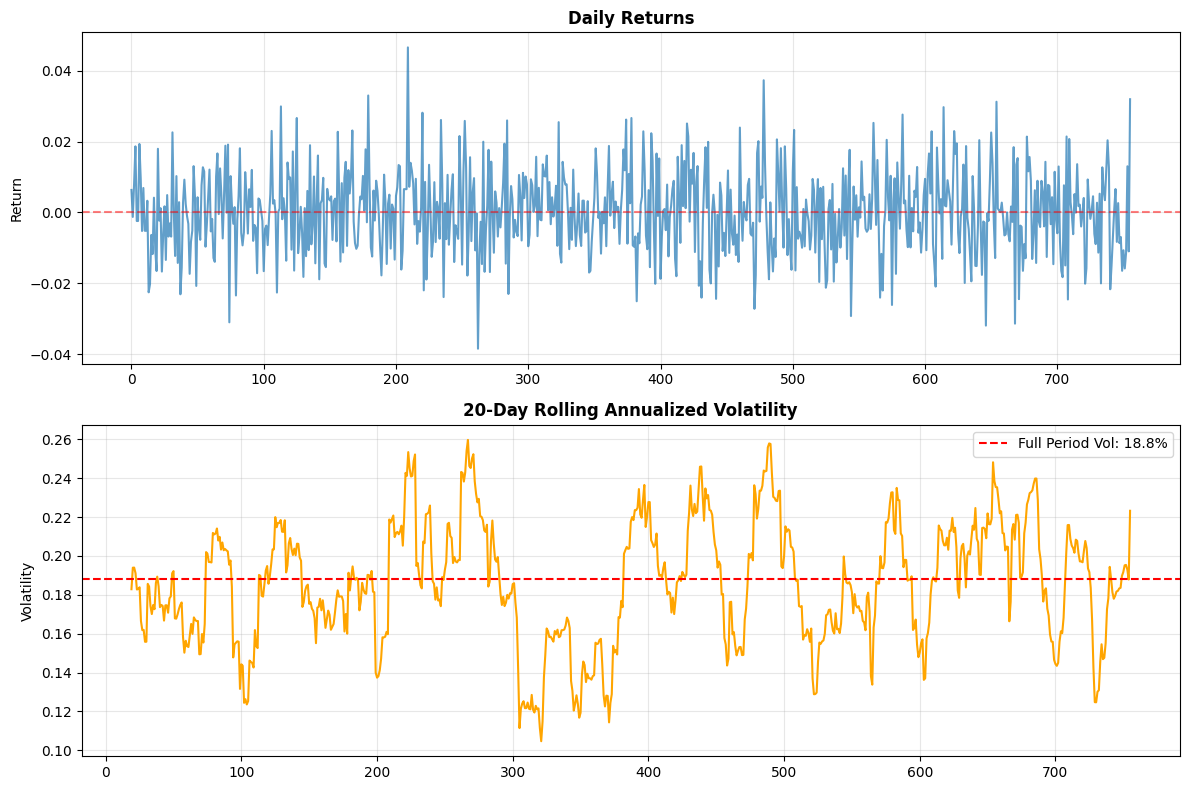

In [12]:
# Volatility calculation
print("VOLATILITY CALCULATION")
print("="*60)

# Generate realistic return series
np.random.seed(42)
n_days = 252 * 3  # 3 years
daily_returns = np.random.normal(0.0004, 0.012, n_days)  # ~10% annual return, ~19% vol

# Calculate volatility
daily_vol = np.std(daily_returns, ddof=1)  # ddof=1 for sample std
annual_vol = daily_vol * np.sqrt(TRADING_DAYS)

print(f"Daily volatility:     {daily_vol:.4%}")
print(f"Annualized volatility: {annual_vol:.2%}")

# Rolling volatility
returns_series = pd.Series(daily_returns)
rolling_vol = returns_series.rolling(20).std() * np.sqrt(TRADING_DAYS)

print(f"\n20-day rolling volatility (last 5 days):")
print(f"   {rolling_vol.tail().values}")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Returns
axes[0].plot(daily_returns, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].set_title('Daily Returns', fontweight='bold')
axes[0].set_ylabel('Return')
axes[0].grid(True, alpha=0.3)

# Rolling volatility
axes[1].plot(rolling_vol.values, color='orange', linewidth=1.5)
axes[1].axhline(y=annual_vol, color='r', linestyle='--', label=f'Full Period Vol: {annual_vol:.1%}')
axes[1].set_title('20-Day Rolling Annualized Volatility', fontweight='bold')
axes[1].set_ylabel('Volatility')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 📊 OUTPUT EXPLANATION:

- **Daily volatility** is small (~1-2%) but compounds
- **Annualized** by √252 factor
- **Rolling volatility** shows time-varying risk (volatility clustering)
- Notice volatility is NOT constant - this violates basic model assumptions!

---

# Part 5: Correlation and Covariance

## Covariance
$$Cov(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]$$

## Correlation (Pearson)
$$\rho_{XY} = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}$$

## Portfolio Variance
$$\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$$

In [13]:
# Generate correlated asset returns
print("CORRELATION AND COVARIANCE")
print("="*60)

# Define correlation structure
np.random.seed(42)
n_days = 252

# True correlation matrix (what we're trying to simulate)
true_corr = np.array([
    [1.0, 0.7, 0.3, -0.2],
    [0.7, 1.0, 0.5, -0.1],
    [0.3, 0.5, 1.0, 0.0],
    [-0.2, -0.1, 0.0, 1.0]
])

# Individual volatilities
vols = np.array([0.20, 0.25, 0.15, 0.30]) / np.sqrt(252)  # Daily vols

# Build covariance matrix: Σ = diag(σ) × ρ × diag(σ)
true_cov = np.diag(vols) @ true_corr @ np.diag(vols)

# Generate returns
means = np.array([0.10, 0.08, 0.05, 0.12]) / 252  # Daily expected returns
returns = np.random.multivariate_normal(means, true_cov, n_days)

# Create DataFrame
assets = ['Tech', 'Finance', 'Utilities', 'Gold']
df_returns = pd.DataFrame(returns, columns=assets)

# Calculate sample statistics
sample_corr = df_returns.corr()
sample_cov = df_returns.cov()

print("Asset Names:", assets)
print(f"\nSample Correlation Matrix:")
print(sample_corr.round(3).to_string())

print(f"\n📊 Key Observations:")
print(f"   Tech-Finance correlation: {sample_corr.loc['Tech', 'Finance']:.3f} (correlated sectors)")
print(f"   Tech-Gold correlation: {sample_corr.loc['Tech', 'Gold']:.3f} (diversification benefit!)")

CORRELATION AND COVARIANCE
Asset Names: ['Tech', 'Finance', 'Utilities', 'Gold']

Sample Correlation Matrix:
            Tech  Finance  Utilities   Gold
Tech       1.000    0.692      0.229 -0.130
Finance    0.692    1.000      0.438  0.011
Utilities  0.229    0.438      1.000 -0.003
Gold      -0.130    0.011     -0.003  1.000

📊 Key Observations:
   Tech-Finance correlation: 0.692 (correlated sectors)
   Tech-Gold correlation: -0.130 (diversification benefit!)


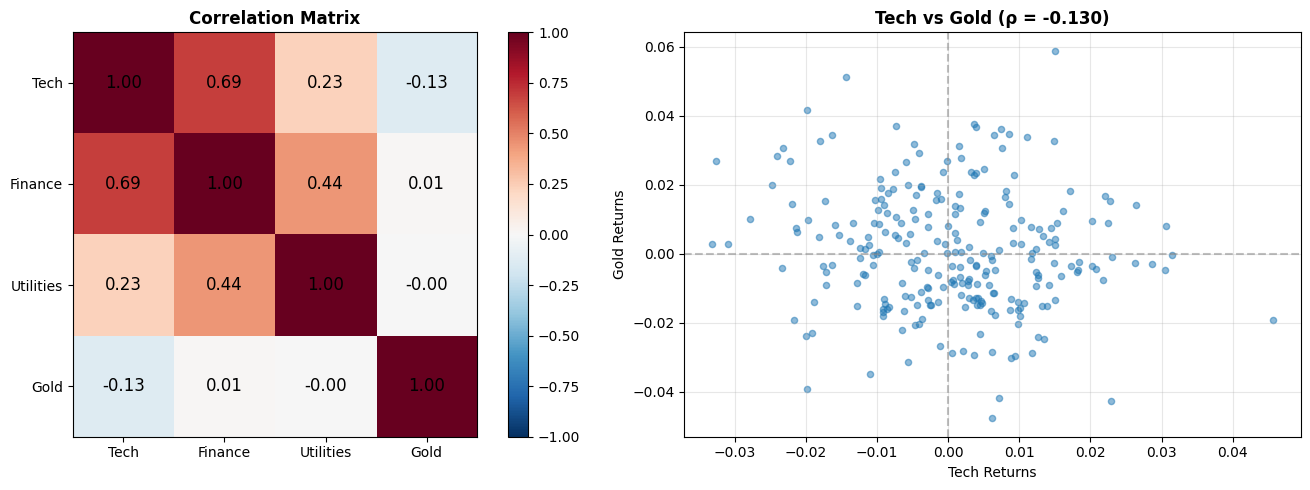


📊 OUTPUT EXPLANATION:
• Red = Positive correlation (move together)
• Blue = Negative correlation (move opposite)
• Diagonal = 1.0 (asset with itself)
• Gold shows negative correlation with Tech → Great for diversification!


In [14]:
# Visualize correlation matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
im = axes[0].imshow(sample_corr.values, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0].set_xticks(range(4))
axes[0].set_yticks(range(4))
axes[0].set_xticklabels(assets)
axes[0].set_yticklabels(assets)
axes[0].set_title('Correlation Matrix', fontweight='bold')

# Add correlation values
for i in range(4):
    for j in range(4):
        axes[0].text(j, i, f'{sample_corr.iloc[i, j]:.2f}', 
                     ha='center', va='center', fontsize=12)

plt.colorbar(im, ax=axes[0])

# Scatter plot
axes[1].scatter(df_returns['Tech'], df_returns['Gold'], alpha=0.5, s=20)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Tech Returns')
axes[1].set_ylabel('Gold Returns')
axes[1].set_title(f'Tech vs Gold (ρ = {sample_corr.loc["Tech", "Gold"]:.3f})', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 OUTPUT EXPLANATION:")
print("• Red = Positive correlation (move together)")
print("• Blue = Negative correlation (move opposite)")
print("• Diagonal = 1.0 (asset with itself)")
print("• Gold shows negative correlation with Tech → Great for diversification!")

---

# Part 6: Financial Visualizations

Creating professional, publication-quality charts is essential for:
- Communicating with portfolio managers
- Presenting at investment committees
- Research reports and publications

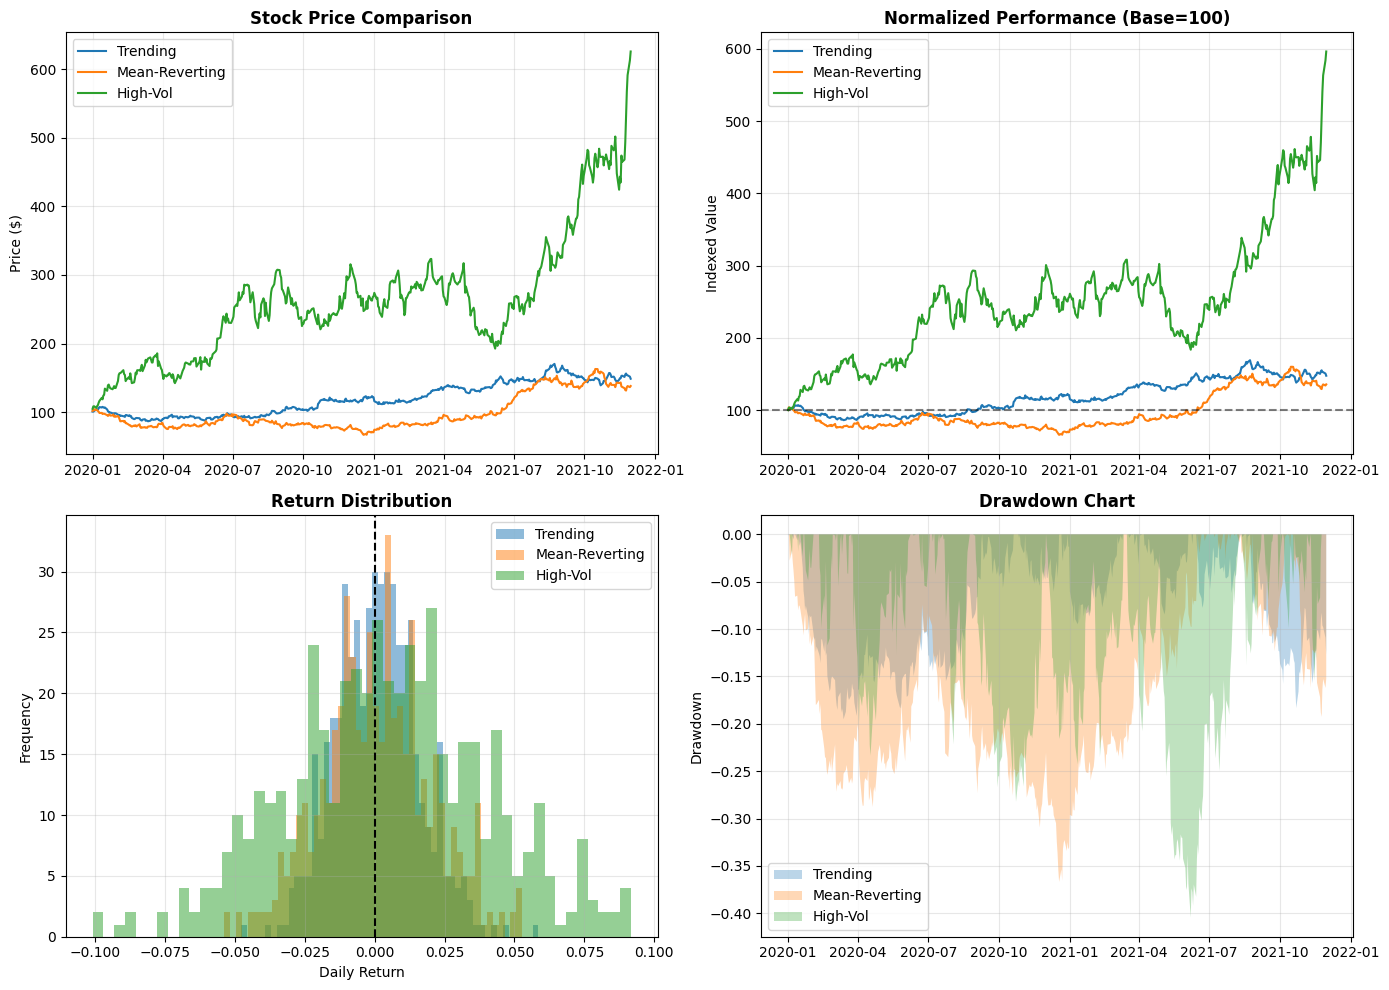


📊 PERFORMANCE SUMMARY:
                Total Return  Ann. Return  Ann. Vol  Max Drawdown  Sharpe
Trending               0.475        0.217     0.234        -0.195   0.926
Mean-Reverting         0.356        0.166     0.311        -0.367   0.534
High-Vol               4.963        1.459     0.561        -0.404   2.602


In [15]:
# Publication-quality financial charts
np.random.seed(42)

# Generate price series with different characteristics
dates = pd.date_range('2020-01-01', periods=500, freq='B')

# Trending stock
trend_returns = np.random.normal(0.0008, 0.015, 500)
trend_prices = 100 * np.cumprod(1 + trend_returns)

# Mean-reverting stock
mean_rev_returns = np.random.normal(0.0002, 0.02, 500)
mean_rev_prices = 100 * np.cumprod(1 + mean_rev_returns)

# Volatile stock
vol_returns = np.random.normal(0.0005, 0.035, 500)
vol_prices = 100 * np.cumprod(1 + vol_returns)

df_viz = pd.DataFrame({
    'Trending': trend_prices,
    'Mean-Reverting': mean_rev_prices,
    'High-Vol': vol_prices
}, index=dates)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Price chart
for col in df_viz.columns:
    axes[0, 0].plot(df_viz.index, df_viz[col], label=col, linewidth=1.5)
axes[0, 0].set_title('Stock Price Comparison', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# 2. Normalized (rebased to 100)
normalized = df_viz / df_viz.iloc[0] * 100
for col in normalized.columns:
    axes[0, 1].plot(normalized.index, normalized[col], label=col, linewidth=1.5)
axes[0, 1].axhline(y=100, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Normalized Performance (Base=100)', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Indexed Value')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# 3. Return distribution
returns_df = df_viz.pct_change().dropna()
for i, col in enumerate(returns_df.columns):
    axes[1, 0].hist(returns_df[col], bins=50, alpha=0.5, label=col)
axes[1, 0].axvline(x=0, color='black', linestyle='--')
axes[1, 0].set_title('Return Distribution', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Daily Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Drawdown chart
def calculate_drawdown(prices):
    peak = prices.expanding().max()
    drawdown = (prices - peak) / peak
    return drawdown

for col in df_viz.columns:
    dd = calculate_drawdown(df_viz[col])
    axes[1, 1].fill_between(dd.index, dd.values, 0, alpha=0.3, label=col)
axes[1, 1].set_title('Drawdown Chart', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Drawdown')
axes[1, 1].legend(loc='lower left')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 PERFORMANCE SUMMARY:")
print("="*70)
stats = pd.DataFrame({
    'Total Return': (df_viz.iloc[-1] / df_viz.iloc[0] - 1).values,
    'Ann. Return': ((df_viz.iloc[-1] / df_viz.iloc[0]) ** (252/500) - 1).values,
    'Ann. Vol': returns_df.std().values * np.sqrt(252),
    'Max Drawdown': [calculate_drawdown(df_viz[c]).min() for c in df_viz.columns],
}, index=df_viz.columns)

stats['Sharpe'] = stats['Ann. Return'] / stats['Ann. Vol']

print(stats.round(3).to_string())

---

# Summary: Key Formulas & Concepts

## Returns
| Type | Formula | When to Use |
|------|---------|-------------|
| Simple | $R_t = P_t/P_{t-1} - 1$ | Portfolio returns |
| Log | $r_t = \ln(P_t/P_{t-1})$ | Time aggregation |

## Risk Metrics
| Metric | Formula | Annualization |
|--------|---------|---------------|
| Volatility | $\sigma = std(r)$ | $\times \sqrt{252}$ |
| Sharpe | $(r - r_f)/\sigma$ | Use annual values |

## Portfolio
| Concept | Formula |
|---------|--------|
| Portfolio Return | $r_p = \mathbf{w}^T \mathbf{r}$ |
| Portfolio Variance | $\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$ |

## ⚠️ Critical Reminders
1. Always use `.shift(1)` for signals to avoid look-ahead bias
2. Normalize features before ML models
3. Use business day calendars
4. Vectorize with NumPy for speed

In [16]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║     WEEK 1 COMPLETE: PYTHON FOR QUANTITATIVE FINANCE             ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  ✓ Part 1: NumPy Fundamentals                                   ║
║    • Vectorization and speed                                    ║
║    • Broadcasting                                               ║
║    • Essential financial functions                              ║
║                                                                  ║
║  ✓ Part 2: Pandas Time Series                                   ║
║    • DatetimeIndex                                              ║
║    • Resampling                                                 ║
║    • Point-in-time data (avoiding look-ahead bias)              ║
║                                                                  ║
║  ✓ Part 3: Returns Calculation                                  ║
║    • Simple vs Log returns                                      ║
║    • Time aggregation                                           ║
║                                                                  ║
║  ✓ Part 4: Volatility                                           ║
║    • Daily and annualized                                       ║
║    • Rolling calculations                                       ║
║                                                                  ║
║  ✓ Part 5: Correlation & Covariance                             ║
║    • Matrix operations                                          ║
║    • Portfolio variance                                         ║
║                                                                  ║
║  ✓ Part 6: Financial Visualizations                             ║
║    • Publication-quality charts                                 ║
║                                                                  ║
╚══════════════════════════════════════════════════════════════════╝

🎯 Next Week: Statistics & Probability for Finance!
""")


╔══════════════════════════════════════════════════════════════════╗
║     WEEK 1 COMPLETE: PYTHON FOR QUANTITATIVE FINANCE             ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  ✓ Part 1: NumPy Fundamentals                                   ║
║    • Vectorization and speed                                    ║
║    • Broadcasting                                               ║
║    • Essential financial functions                              ║
║                                                                  ║
║  ✓ Part 2: Pandas Time Series                                   ║
║    • DatetimeIndex                                              ║
║    • Resampling                                                 ║
║    • Point-in-time data (avoiding look-ahead bias)              ║
║                                                                  ║
║  ✓ Part 3: Returns Calculation         